In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
#To read the train dataset
train_data = pd.read_csv("/kaggle/input/titanic-machine-learning-from-disaster/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv("/kaggle/input/titanic-machine-learning-from-disaster/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Show the type for each column
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Show the type for each column
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# To show the total nulls in the dataset to be able to deal with them
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# To show the total nulls in the dataset to be able to deal with them
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Feature engineering

Spouse = husband, wife (mistresses and fiancés were ignored)

Some children travelled only with a nanny, therefore parch=0 for them

[This will explain the if the sum will be 0]

In [8]:
#We tried to calculate the total number for each family
train_data['Family_members']=train_data['SibSp']+train_data['Parch']
train_data=train_data.drop(['SibSp','Parch'],axis = 1)
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
Ticket              0
Fare                0
Cabin             687
Embarked            2
Family_members      0
dtype: int64

In [9]:
train_data.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Family_members      int64
dtype: object

In [10]:
#We tried to calculate the total number for each family
test_data['Family_members']=test_data['SibSp']+test_data['Parch']
test_data=test_data.drop(['SibSp','Parch'],axis = 1)
test_data.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                86
Ticket              0
Fare                1
Cabin             327
Embarked            0
Family_members      0
dtype: int64

In [11]:
test_data.dtypes

PassengerId         int64
Pclass              int64
Name               object
Sex                object
Age               float64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Family_members      int64
dtype: object

In [12]:
#We tried to convert the male, female to numeric 
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})
train_data.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Family_members      int64
dtype: object

In [13]:
#We tried to convert the male, female to numeric 
test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})
test_data.dtypes

PassengerId         int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Family_members      int64
dtype: object

In [14]:
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
Ticket              0
Fare                0
Cabin             687
Embarked            2
Family_members      0
dtype: int64

In [15]:
test_data.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                86
Ticket              0
Fare                1
Cabin             327
Embarked            0
Family_members      0
dtype: int64

In [16]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# We drpped the rows which contained the nulls in the cabin as the are 2 nulls only which will not affect the dataset 
# train_data.dropna(subset=['Embarked'], inplace=True)
train_data['Embarked']=train_data['Embarked'].map({'S':0,'C':1,'Q':2})
train_data['Embarked']=train_data['Embarked'].dropna().mode()[0]

In [18]:
# # We dropped the rows which contained the nulls in the cabin as the are 2 nulls only which will not affect the dataset 
# test_data.dropna(subset=['Embarked'], inplace=True)
test_data['Embarked']=test_data['Embarked'].map({'S':0,'C':1,'Q':2})
test_data['Fare']=test_data['Fare'].dropna().mode()[0]

In [19]:
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
Ticket              0
Fare                0
Cabin             687
Embarked            0
Family_members      0
dtype: int64

In [20]:
test_data.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                86
Ticket              0
Fare                0
Cabin             327
Embarked            0
Family_members      0
dtype: int64

# We will plot to get the relations between the target and the columns

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

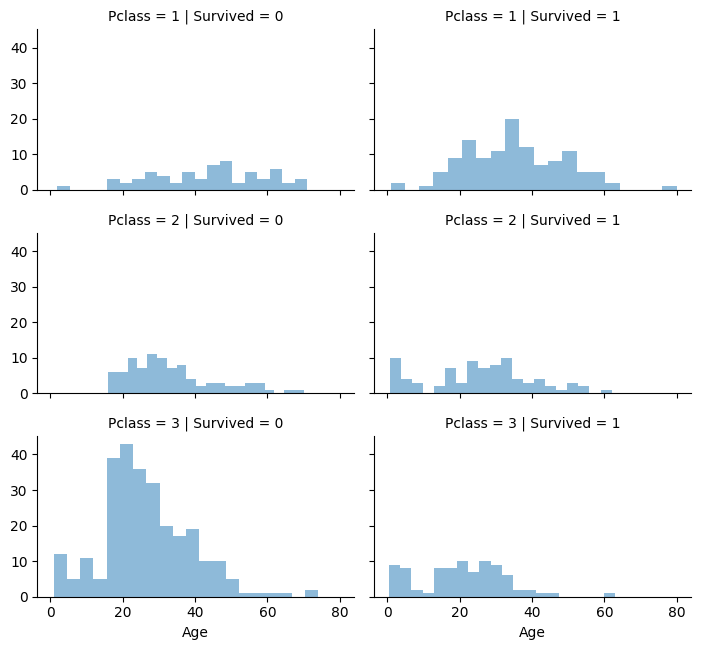

In [22]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
# Each histogram (age) represents the distribution of ages for passengers within a specific combination of passenger class and survival outcome.
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In this graph, it means that pclass with value = 1 had much better survival rate (the first class), while the pclass with value = 3 is worst survival rate 

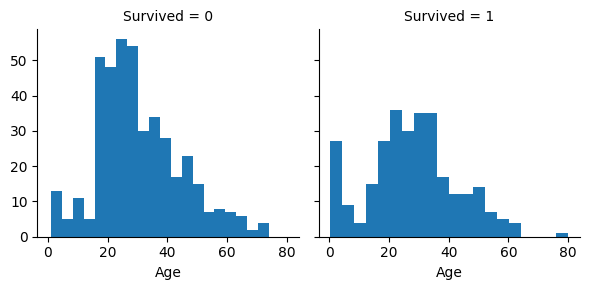

In [23]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

We plot the age with the survived to see how the age distribution varies between passengers 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


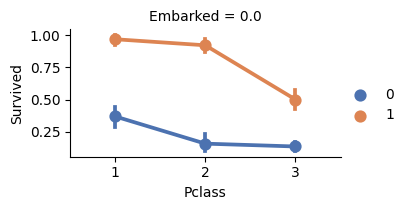

In [24]:
#this visualization creates a grid of pointplots where each row represents a different port of embarkation ('Embarked')
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
#Each pointplot within a row shows the relationship between passenger class ('Pclass'), survival ('Survived'), and gender ('Sex')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In that graph, it means that females had much better survival rate than males

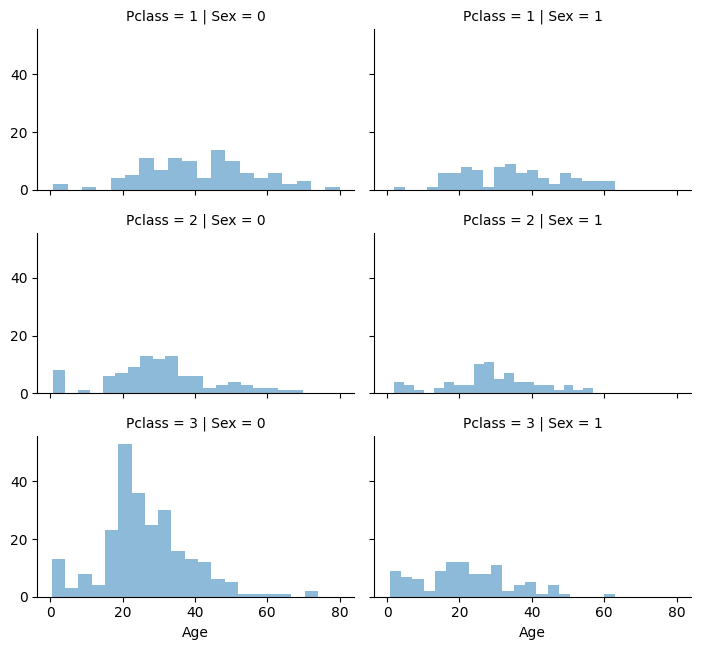

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

I will use groupby median because I want to keep group-wise patterns

I choose the Pclass with Age as there is a high correlation between them ,

for instance , younger passengers might be more likely to travel in higher classes with their families, while older passengers might be more common in lower classes or traveling alone. 

In [26]:
median_age_by_pclass = train_data.groupby('Pclass')['Age'].transform('median')
train_data['Age'].fillna(median_age_by_pclass, inplace=True)

/tmp/ipykernel_263/4148849862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(median_age_by_pclass, inplace=True)


In [27]:
median_age_by_pclass = test_data.groupby('Pclass')['Age'].transform('median')
test_data['Age'].fillna(median_age_by_pclass, inplace=True)

/tmp/ipykernel_263/4094014520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(median_age_by_pclass, inplace=True)


In [28]:
train_data.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
Ticket             object
Fare              float64
Cabin              object
Embarked          float64
Family_members      int64
dtype: object

In [29]:
test_data.dtypes

PassengerId         int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
Ticket             object
Fare              float64
Cabin              object
Embarked            int64
Family_members      int64
dtype: object

In [30]:
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
Ticket              0
Fare                0
Cabin             687
Embarked            0
Family_members      0
dtype: int64

In [31]:
test_data.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
Ticket              0
Fare                0
Cabin             327
Embarked            0
Family_members      0
dtype: int64

# Now , we will apply many Model and see the predictions

In [32]:
X_train=train_data.drop(["Survived","Cabin","PassengerId","Name","Ticket"], axis=1)
X_test=test_data.drop(["Cabin","PassengerId","Name","Ticket"], axis=1)
y_train = train_data["Survived"]
#Print the shape
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.47

In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.2

In [35]:
# SVM Model
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
Y_pred_svm = svm_model.predict(X_test)
acc_svm=round(svm_model.score(X_train,y_train)*100 , 2)
acc_svm

68.13

In [36]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
Y_pred_rfc = model.predict(X_test)
acc_rfc=round(model.score(X_train,y_train)*100 , 2)
acc_rfc

85.52

In [44]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred_lsvc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

In [45]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred_sgdc = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

62.74

# Prediction

In [37]:
#Decision Tree
output = pd.DataFrame({'PassengerId': test_data["PassengerId"], 'Survived': Y_pred_dt})
output.to_csv('final_submission_3.csv', index=False, header=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


It gives 71%

In [38]:
##RandomForestClassifier
output = pd.DataFrame({'PassengerId': test_data["PassengerId"], 'Survived': Y_pred_rfc})
output.to_csv('final_submission_4.csv', index=False, header=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


It gives 77%

In [39]:
# SVM Model
output = pd.DataFrame({'PassengerId': test_data["PassengerId"], 'Survived': Y_pred_svm})
output.to_csv('final_submission_5.csv', index=False, header=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


It gives 66%

In [40]:
# Logistic Regression
output = pd.DataFrame({'PassengerId': test_data["PassengerId"], 'Survived': Y_pred_log})
output.to_csv('final_submission_6.csv', index=False, header=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


It gives 76%